### Wstęp

Zbiór danych pochodzi z artykułu dostępnego pod adresem [ScienceDirect](https://www.sciencedirect.com/science/article/pii/S2352340918315191#f0010), zawierającego dane wyekstrahowane z baz SQL systemów zarządzania nieruchomościami (PMS) hoteli. Autorami są Nuno Antonio, Ana de Almeida oraz Luis Nunes.

Dane stanowią połączenie dwóch zbiorów:
  - H1 – dane hotelu wypoczynkowego, obejmujące 40 060 obserwacji.
  - H2 – dane hotelu miejskiego, obejmujące 79 330 obserwacji.
  
Oba zbiory mają identyczną strukturę, zawierając 31 zmiennych opisujących każdą rezerwację. Dane dotyczą rezerwacji osób, które miały przybyć w okresie od 1 lipca 2015 do 31 sierpnia 2017, w tym zarówno rezerwacji zakończonych przybyciem, jak i odwołanych.

Celem analizy jest:

1. Identyfikacja zmiennych mających istotny wpływ na decyzję gości o anulowaniu rezerwacji.
2. Opracowanie modeli klasyfikacyjnych pozwalających na predykcję prawdopodobieństwa anulowania rezerwacji.



Opis cech występujących w zbiorze:
| Zmienna                       | Typ       | Opis                                                                                      |
|-------------------------------|-----------|-------------------------------------------------------------------------------------------|
| hotel                         | character | Hotel (H1 = Hotel wypoczynkowy lub H2 = Hotel Miejski)                                         |
| is_canceled                   | double    | Wartość wskazująca, czy rezerwacja została anulowana (1), czy nie (0)                    |
| lead_time                     | double    | Liczba dni od wprowadzenia rezerwacji do systemu PMS do daty przyjazdu                   |
| arrival_date_year             | double    | Rok daty przyjazdu                                                                       |
| arrival_date_month            | character | Miesiąc daty przyjazdu                                                                   |
| arrival_date_week_number      | double    | Numer tygodnia roku, w którym wypada data przyjazdu                                    |
| arrival_date_day_of_month     | double    | Dzień miesiąca, w którym wypada data przyjazdu                                         |
| stays_in_weekend_nights       | double    | Liczba noclegów w weekend (sobota / niedziela)                                         |
| stays_in_week_nights          | double    | Liczba noclegów w dni robocze (poniedziałek-piątek)                                      |
| adults                        | double    | Liczba osób dorosłych                                                                    |
| children                      | double    | Liczba dzieci                                                                            |
| babies                        | double    | Liczba niemowląt                                                                         |
| meal                          | character | Rodzaj wykupionego wyżywienia: Undefined/SC (brak), BB (nocleg i śniadanie), HB (śniadanie i jeden dodatkowy posiłek), FB (pełne wyżywienie: śniadanie, obiad i kolacja)     |
| country                       | character | Kraj pochodzenia gościa w formacie ISO 3155-3:2013                                       |
| market_segment                | character | Segment marketu: Online/Offline TA/TO ( rezerwacja przez internet/na żywo za pośrednictwem biur podróży/touroperatorów, Direct (bezpośrednio w hotelu), Corporate (rezerwacja przez firmę))                               |
| distribution_channel          | character | Kanał dystrybucji: TA, TO                          |
| is_repeated_guest             | double    | Czy gość jest powracający (1), czy nie (0)                                               |
| previous_cancellations        | double    | Liczba anulowanych rezerwacji przed obecną                                               |
| previous_bookings_not_canceled| double    | Liczba rezerwacji, które nie zostały anulowane przed obecną                              |
| reserved_room_type            | character | Standard/rodzaju pokoju zarezerwowanego                                                      |
| assigned_room_type            | character | Standard/rodzaju pokoju przydzielonego                                                       |
| booking_changes               | double    | Liczba zmian wprowadzonych do rezerwacji                                                |
| deposit_type                  | character | Typ zaliczki: No Deposit (brak), Non Refund (bezzwrotna), Refundable (zwrotna)          |
| agent                         | character | ID biura podróży                                                                         |
| company                       | character | ID firmy/podmiotu opłacającego rezerwację                                                |
| days_in_waiting_list          | double    | Liczba dni na liście oczekujących                                                        |
| customer_type                 | character | Typ rezerwacji: Contract, Group, Transient, Transient-party                              |
| adr                           | double    | Średnia dzienna stawka (ADR)                                                            |
| required_car_parking_spaces   | double    | Liczba wymaganych miejsc parkingowych                                                   |
| total_of_special_requests     | double    | Liczba specjalnych życzeń                                                                |
| reservation_status            | character | Ostatni status rezerwacji: Canceled(rezerwacja została anulowana przez klienta), Check-Out (klient zameldował się, ale już wyjechał), No-Show (klient nie zameldował się i poinformował hotelu o powodzie)                                 |
| reservation_status_date       | double    | Data ustawienia ostatniego statusu rezerwacji (anulowanie rezerwacji lub wemeldowanie się)                                           |


### Wczytywanie bibliotek oraz danych 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pycaret

from pycaret.classification import *
from sklearn.preprocessing import normalize

In [2]:
dane = pd.read_csv('hotel_bookings.csv')
dane.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
dane.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
dane.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [5]:
dane.describe(include='object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,926
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-10-21
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,1461


### EDA

In [40]:
dane_eda = dane.copy()

#### Statystyki opisowe  i więcej dla wybranych kolumn

##### arrival_date_year, arrival_date_month, arrival_date_day_of_month, arrival_date_week_number

Przyjrzymy się teraz kolumną, które dotyczą daty przyjazdu gości. Będziemy patrzyli na wszystkie, ponieważ są one ze sobą powiązane i nie ma sensu patrzeć tylko na jedną z osobna. Zaczniemy od ustalenia typu zmienncyh, obliczenia ich statystyk opisowych oraz sprawdzeniu czy w tych kolumnach są jakieśc wartości brakujące.

In [28]:
dane_eda[['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month']].dtypes

arrival_date_year             int64
arrival_date_month           object
arrival_date_day_of_month     int64
dtype: object

Jak widać powyżej, kolumny z rokiem i dniem miesiąca są typu int64, a kolumna z miesiącem jest typu object, dlatego, że zawiera nazwy miesięcy. Jednak na potzreby wizualizacji i porównania lat oraz miesięcy w swoich odpowiednich kategoriach, zamienię te kolumny na typ category (tylko na czas EDA). Dzień miesiąca zostaje jako int64.

In [41]:
dane_eda['arrival_date_year'] = dane_eda['arrival_date_year'].astype('category')
dane_eda['arrival_date_month'] = dane_eda['arrival_date_month'].astype('category')

dane_eda[['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month']].describe(include = ['category', 'int64'])

,arrival_date_year,arrival_date_month,arrival_date_day_of_month
count,119390.0,119390,119390.000000
unique,3.0,12,NaN
top,2016.0,August,NaN
freq,56707.0,13877,NaN
mean,NaN,NaN,15.798241
std,NaN,NaN,8.780829
min,NaN,NaN,1.000000
25%,NaN,NaN,8.000000
50%,NaN,NaN,16.000000
75%,NaN,NaN,23.000000


Zmienna arrival_date_year składa się z 3 lat, z czego najwięcej rezerwacji dotyczy roku 2016. Zmienna arrival_date_month składa się z 12 miesięcy, z czego najwięcej rezerwacji dotyczy sierpnia. Za to zmienna arrival_date_day_of_month jest w przedziale od 1 do 31, co jest zgodne z kalendarzem, mediana dnia miesiąca wynosi 16.
Przyjrzymy się teraz bliżej rozkładom tych zmiennych, aby zobaczyć jak zmienia się liczność rezerwacji w poszczególnych latach, miesiącach i dniach.

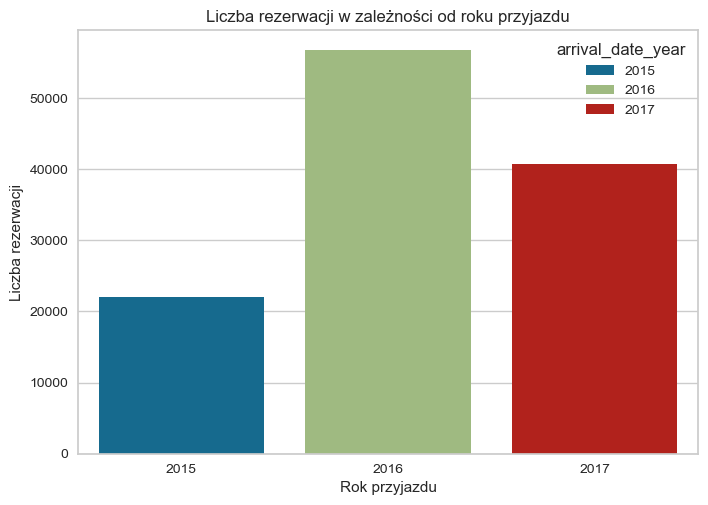

In [42]:
w1 = sns.countplot(data = dane_eda, x = 'arrival_date_year', hue = 'arrival_date_year')
w1.set_title('Liczba rezerwacji w zależności od roku przyjazdu')
w1.set_xlabel('Rok przyjazdu')  
w1.set_ylabel('Liczba rezerwacji')
plt.show()

Z powyższego wykresu da się co nieco wywnioskować, widać, że z 2015 mamy najmniej rezerwacji, a z 2016 najwięcej. Różnice są spore, jednak stoi za tym fakt, że mamy dane tylko dla części 2015 i 2017 roku, w przeciwieństwie do 2016 roku. Należy mieć to w pamięci patrząc na liczności rezerwacji dla konkretnych miesięcy, ponieważ część miesięcy wystąpiła trzy raz, a część tylko dwa. Lepiej widać to na poniższym wykresie.

In [ ]:
dane_eda['arrival_date'] = dane_eda['arrival_date_year'].astype(str) + '-' + dane_eda['arrival_date_month'].astype(str) + '-' + dane_eda['arrival_date_day_of_month'].astype(str)
dane_eda['arrival_date'] = pd.to_datetime(dane_eda['arrival_date'])

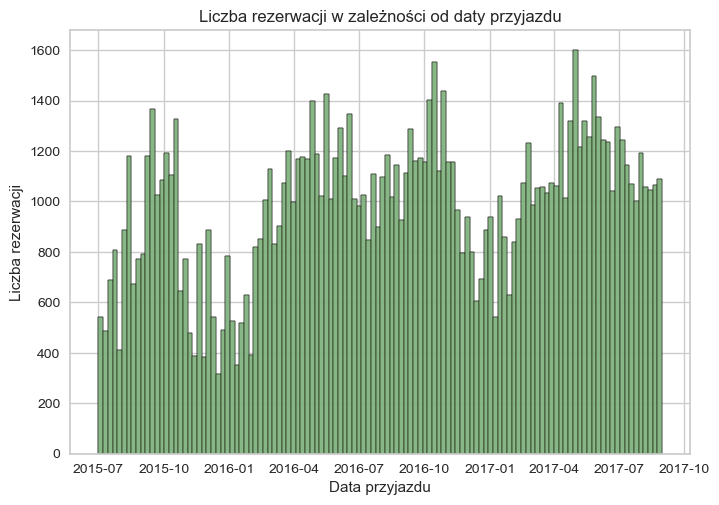

In [48]:
w = sns.histplot(data = dane_eda, x = 'arrival_date', bins = 120)
w.set_title('Liczba rezerwacji w zależności od daty przyjazdu')
w.set_ylabel('Liczba rezerwacji')
w.set_xlabel('Data przyjazdu')
plt.show()

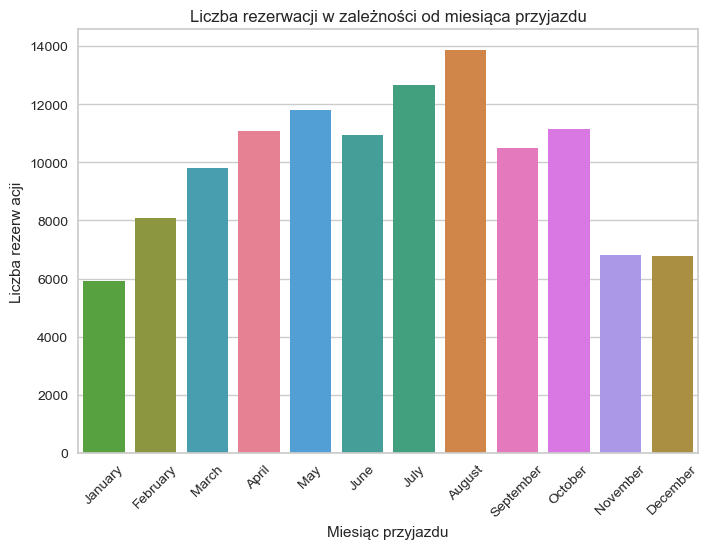

In [ ]:
w2 = sns.countplot(data = dane_eda, x = 'arrival_date_month', hue = 'arrival_date_month', order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
w2.set_title('Liczba rezerwacji w zależności od miesiąca przyjazdu')
w2.set_xlabel('Miesiąc przyjazdu')
w2.set_ylabel('Liczba rezerw acji')
w2.tick_params(axis = 'x', rotation = 45)
plt.show()

Za to ten wykres pokazuje nam, że najwięcej rezerwacji jest w sierpniu, a najmniej w listopadzie. Dodatkowo widać, że w okresie wisoennym, letnim i jesiennym jest więcej rezerwacji niż w okresie zimowym (jednak należy brać poprawkę na to, że nie każdy miesiąc wsytąpił trzy razy)

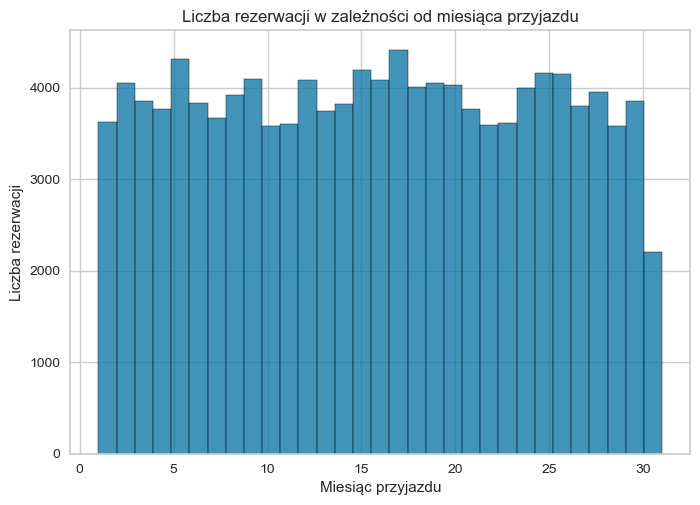

In [64]:
w3 = sns.histplot(data = dane_eda, x = 'arrival_date_day_of_month', bins = 31)
w3.set_title('Liczba rezerwacji w zależności od miesiąca przyjazdu')
w3.set_xlabel('Miesiąc przyjazdu')
w3.set_ylabel('Liczba rezerwacji')
plt.show()

Wykres 3 pokazuje, że najmniej rezerwacji jest w ostatnim dniu miesiąca (oczywiście, bo nie każdy miesiąc ma 31 dni). Poza tym, liczba rezerwacji jest dość równomiernie rozłożona na poszczególne dni miesiąca. Można dostrzec pewne wahania, ale nie są one znaczące. Następnie przyrzymy się jak zmienia się w ciągu roku zmienia się odwoływanie rezerwacji dla obu hoteli.

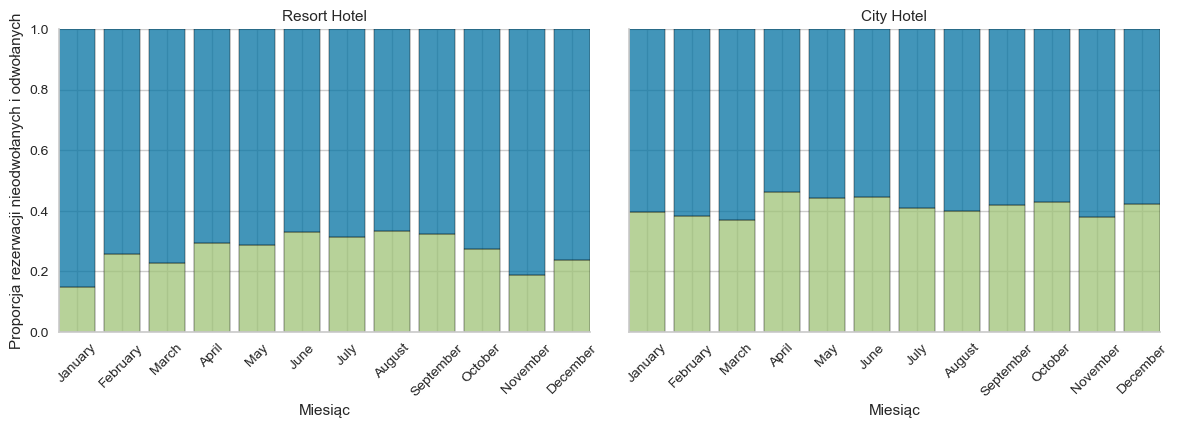

In [ ]:
arrival_date_month_cat = pd.Categorical(dane_eda['arrival_date_month'], categories = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered = True)
dane_eda['arrival_date_month_cat'] = arrival_date_month_cat

g = sns.FacetGrid(dane_eda, col = 'hotel', height = 4, aspect = 1.5, col_wrap = 2)
g.map_dataframe(sns.histplot, x = 'arrival_date_month_cat', hue = 'is_canceled', multiple = 'fill', stat = 'probability', shrink = 0.8)
g.set_titles(col_template = "{col_name}")
g.set_xticklabels(rotation = 45)
g.set_axis_labels("Miesiąc", "Proporcja rezerwacji nieodwołanych i odwołanych")
plt.show()

Na wykresie widać, że w hotelu wypoczynkowym jest większa proporcja rezerwacji nieodwołanych  do odwołąnych w porównaniu do hotelu miejskiego. Widoczne jest również, że w hotelu wypoczczynkowym stosunek rezerwacji odwołanych do nieodwołanych wzrasta w miesiącach letnich, najmniej rezerwacji odwołąnych jest w miesiącach zimowych. Natomiast w hotelu miejskim stosunek ten jest bardziej równomierny. Skąd może brać się taki wzrost odwołalności erzerwacji w hotelu wypoczynkowym w miesiącach letnich?
Jedną z przyczyn może cena pokoi, która może być wyższa w hotelu wypoczynkowym w miesiącach letnich. 

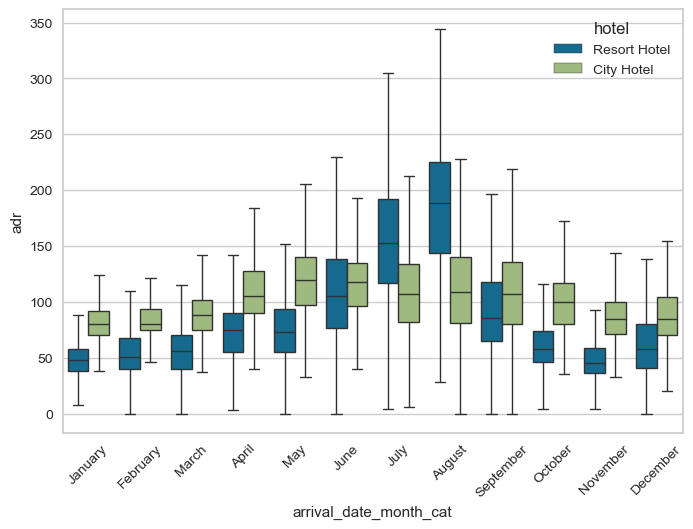

In [ ]:
sns.boxplot(data=dane_eda, x = 'arrival_date_month_cat', y = 'adr', hue = 'hotel', showfliers = False)
plt.title('Cena za noc w zależności od miesiąca przyjazdu')
plt.xticks(rotation=45)
plt.show()

Tutaj wyraźnie widać, że ceny za noc dla hotelu wypoczynkowego są o wiele wyższe w miesiącach letnich, co jest zrozumiałe, ponieważ wtedy jest sezon turystyczny. Dla hotelu miejskiego ceny są bardziej wyrównane, ale również widać, że w miesiącach letnich są wyższe. Warto zauważyć również, że w miesiącach letnich ceny za noc dla hotelu wypoczynkowego są wyższe niż dla hotelu miejskiego, jednak przez resztę roku to hotel miejski ma wyższe ceny.
Zmienna adr może mocno wpływać na to, czy rezerwacja zostanie odwołana, ponieważ jeśli cena za noc jest zbyt wysoka, to klienci mogą zrezygnować z rezerwacji.

##### stays_in_weekend_nights, stays_in_week_nights

Tak jak w poprzednim przypadku rozważę te zmienne razem, ponieważ są one ze sobą powiązane. Zaczniemmy naturalnie od ustalenia typu zmiennych, wyliczenia statystyk oraz sprawdzenia czy nie występują braki danych w tych kolumnach.

In [95]:
dane_eda[['stays_in_weekend_nights', 'stays_in_week_nights']].dtypes

stays_in_weekend_nights    int64
stays_in_week_nights       int64
dtype: object

Obie zmienna są typu int64, więc nie trzeba ich konwertować, ponieważ jak najbardziej pasują do swojego typu.

In [97]:
dane_eda[['stays_in_weekend_nights', 'stays_in_week_nights']].describe()

,stays_in_weekend_nights,stays_in_week_nights
count,119390.000000,119390.000000
mean,0.927599,2.500302
std,0.998613,1.908286
min,0.000000,0.000000
25%,0.000000,1.000000
50%,1.000000,2.000000
75%,2.000000,3.000000
max,19.000000,50.000000


Można zauważyć tu kilka ciekawych rzeczy: 
- Wartości maksymalnae dla liczby noclegów w weekend i na tygodniu są równa odpowiednio 19 i 50. Są to dość duże wartości. Prawdopodbnie mamy do czynienia z sytuacjami w których osoby przebywały wiele tygodni w hotelu. Są to oczywiście outlieary, jednak nie będziemy ich usuwać.
- Wartości minimalne równe 0, oznaczają, że ktoś przebywał w hotelu jednynie na tygodniu albo na weekendzie.

Teraz sprawdźmy czy są jakieś braki danych w tych kolumnach.

In [99]:
dane_eda[['stays_in_weekend_nights', 'stays_in_week_nights']].isna().sum()

stays_in_weekend_nights    0
stays_in_week_nights       0
dtype: int64

Nie ma żadnych braków danych w kolumnach stays_in_weekend_nights i stays_in_week_nights. Po tym krótkim przeglądzie danych, przejdziemy do wizualizacji tych zmiennych. Jednak dalej nie będziemy rozważać tych kolumn osobno, ale zsumujemy je w jedną kolumnę stays_total_nights i na jej podstawie zbadamy zależności z innymi zmiennymi.

In [102]:
dane_eda['total_nights'] = dane_eda['stays_in_weekend_nights'] + dane_eda['stays_in_week_nights']

Odpowiemy teraz na pytanie jak długo goście przebywają w hotelach w zależności od tego czy rezerwacja została odwołana czy nie. Może to być przydatne dla hotelu, aby wiedzieć jak długo goście zazwyczaj zostają w hotelu, aby móc lepiej zarządzać pokojami oraz zobaczyć, czy goście, którzy planują zostają dłużej, są bardziej skłonni do odwołania rezerwacji. Na początej jednak przyjrzyjmy się jeszcze zmiennej total_nights.

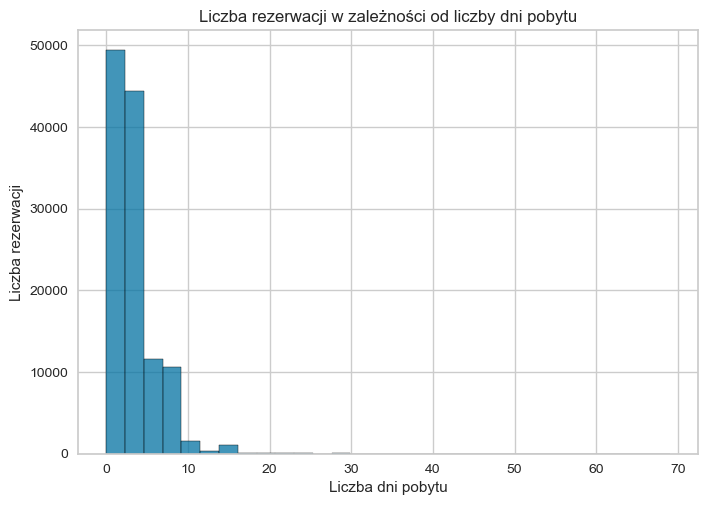

In [ ]:
sns.histplot(data = dane_eda, x = 'total_nights', bins = 30)
plt.title('Liczba rezerwacji w zależności od liczby dni pobytu')
plt.xlabel('Liczba dni pobytu')
plt.ylabel('Liczba rezerwacji')
plt.show()

In [112]:
dane_eda['total_nights'].describe()

count    119390.000000
mean          3.427900
std           2.557439
min           0.000000
25%           2.000000
50%           3.000000
75%           4.000000
max          69.000000
Name: total_nights, dtype: float64

Jest tu kilka ciekawych rzeczy na które trzeba zwrócić uwagę:
- mediana liczby nocy spędzonych w hotelu wynosi 3, co oznacza, że większość rezerwacji to krótkie pobyty
- wartość maksymalna jest całkiem duża, jednak nie ma się tym co martwić, bo jest to wartość odstająca jak i wiele innyvh wartości odstających
- wartość minimalna wynosi 0, co jest dość dziwne, bo nie ma możliwości zarezerwowania pokoju na 0 nocy

W związku z tym, że wartość minimalna jest równa 0, będzie trzeba sprawdzić o co chodzi z tymi rezerwacjami. Czy jest to błąd w danych, czy może jest to jakaś specyficzna sytuacja.

In [ ]:
pd.set_option('display.max_columns', None)

zero_nights = dane_eda[dane_eda['total_nights'] == 0]
print(f'Liczba przypadków, gdzie total_nights wynosi 0: {zero_nights.shape[0]}')


zero_nights.head()

Liczba przypadków, gdzie total_nights wynosi 0: 715


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,arrival_date_month_cat,total_nights
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,July,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,July,0
167,Resort Hotel,0,111,2015,July,28,6,0,0,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,H,0,No Deposit,240.0,NaN,0,Transient,0.0,0,2,Check-Out,2015-07-06,2015-07-06,July,0
168,Resort Hotel,0,0,2015,July,28,6,0,0,1,0.0,0,BB,PRT,Direct,Direct,0,0,0,E,H,0,No Deposit,250.0,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-06,2015-07-06,July,0
196,Resort Hotel,0,8,2015,July,28,7,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,0,No Deposit,NaN,NaN,0,Transient,0.0,0,1,Check-Out,2015-07-07,2015-07-07,July,0


Jak widać jest tych przypadków niewiele. Możliwe jest, że ktoś spędził w hotelu tylko kilka/kilkanaście godzin. Jednakże, nie możemy być pewni, że to o to chodziło, więc usuniemy te dane. Następnie zobaczymy czy liczba nocy w hotelu ma jakiś związek z odwołaniem rezerwacji.

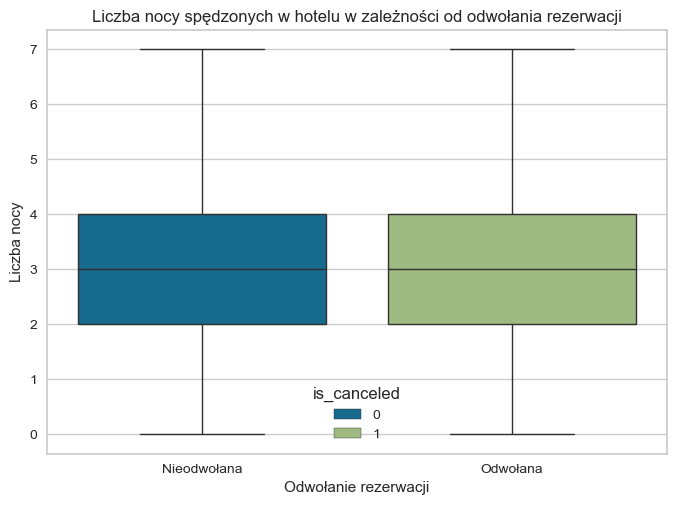

In [162]:
sns.boxplot(data = dane_eda, x = 'is_canceled', y = 'total_nights', hue = 'is_canceled', showfliers = False)
plt.title('Liczba nocy spędzonych w hotelu w zależności od odwołania rezerwacji')
plt.xlabel('Odwołanie rezerwacji')
plt.ylabel('Liczba nocy')
plt.xticks([0, 1], ['Nieodwołana', 'Odwołana'])
plt.show()

Co ciekawe dla obu przypadków liczba nocy spędzonych w hotelu jest identyczna. Teraz zobaczymy jak liczba nocy w hotelu zależy od samego hotelu.

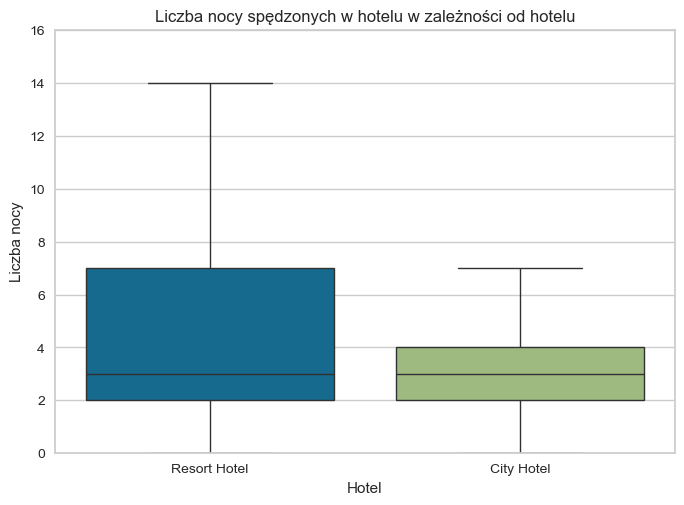

In [166]:
sns.boxplot(data = dane_eda, x = 'hotel', y = 'total_nights', hue = 'hotel', showfliers = False)
plt.title('Liczba nocy spędzonych w hotelu w zależności od hotelu')
plt.xlabel('Hotel')
plt.ylabel('Liczba nocy') 
plt.ylim((0, 16))
plt.show()

Widać, że w przypadku hotelu City Hotel, liczba nocy spędzonych w hotelu jest zdecydowanie mniejsza niż w przypadku Resort Hotel. Zapewne wynika to z faktu, że Resort Hotel jest bardziej atrakcyjny dla turystów, którzy chcą spędzić więcej czasu na wakacjach.  W przypadku City Hotel, goście są prawdopodobnie bardziej zainteresowani krótkimi wizytami w mieście. Srawdżmy, czy ta spora różnica między hotelami zależy od pory roku.

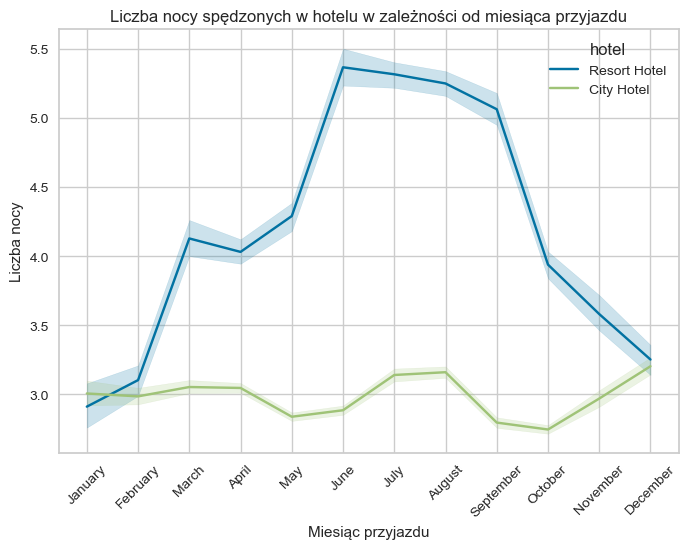

In [153]:
sns.lineplot(data = dane_eda, x = 'arrival_date_month_cat', y = 'total_nights', hue = 'hotel')
plt.title('Liczba nocy spędzonych w hotelu w zależności od miesiąca przyjazdu')
plt.xlabel('Miesiąc przyjazdu')
plt.ylabel('Liczba nocy')
plt.xticks(rotation = 45)
plt.show()

W przypadku rezerwacji w hotelu City Hotel, liczba nocy spędzonych w hotelu jest zbliżona w każdym miesiącu, natomiast w przypadku rezerwacji w hotelu Resort Hotel, liczba nocy spędzonych w hotelu jest większa w miesiącach letnich.

Co wiąże się z obserwacją z poprzedniej części EDA, któta ukazywała, że w letnich miesiącach pobyt w hotelach jest droższy niż w pozostałych miesiącach. Łącząc te dwie obserwacje można wysnuć wniosek, że goście rezerwują dłuższe i droższe za dobe pobyty przez co może prowadzić do częstszych odwołań.

### Detekcja outlierów i anomalii

Skupimy się teraz na detekcji anomalii w naszym zbiorze danych. W tym celu wykorzystamy bibiloteke sklearn oraz pycaret. W pierwszej kolejności przygotujemy dane do analizy.